# Proyecto Final

## Carga de Datos

In [18]:
import pandas as pd

try:
  datos = pd.read_csv('auto-mpg.csv')
  print(datos.head(10))  
except FileNotFoundError:
  print('El archivo no existe.')
except Exception as ex:
  print('Error general:', str(ex))

    mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0    3504          12.0   
1  15.0          8         350.0       165.0    3693          11.5   
2  18.0          8         318.0       150.0    3436          11.0   
3  16.0          8         304.0       150.0    3433          12.0   
4  17.0          8         302.0       140.0    3449          10.5   
5  15.0          8         429.0       198.0    4341          10.0   
6  14.0          8         454.0       220.0    4354           9.0   
7  14.0          8         440.0       215.0    4312           8.5   
8  14.0          8         455.0       225.0    4425          10.0   
9  15.0          8         390.0       190.0    3850           8.5   

   model year  origin                   car name  
0          70       1  chevrolet chevelle malibu  
1          70       1          buick skylark 320  
2          70       1         plymouth satellite  
3          70       1    

## Creación clase Automóvil

In [41]:
import pandas as pd


class VehiculoExcepcion(Exception):
  pass

class Automovil:
  def __init__(self, mpg, cilindros, desplazamiento, caballos_de_fuerza,
               peso, aceleracion, anio, origen, nombre):
    """Constructor de la clase Automovil
        Recibe como parámetros los items que se leen desde el archivo csv

    Args:
        mpg (string): millas por galón
        cilindros (integer): número de cilindros
        desplazamiento (integer): volumen de los cilindros
        caballos_de_fuerza (string): potencia del motor
        peso (float): peso en toneladas
        aceleracion (float): aceleración del vehículo
        anio (integer): anio del modelo
        origen (integer): origen del vehiculo
        nombre (string): model del vehículo
    """
    if mpg == "NA" or caballos_de_fuerza == "NA":
      raise VehiculoExcepcion(f"El vehiculo {nombre} requiere el valor para el campo mpg y horsepower")  
    self.__mpg = mpg,
    self.__cilindros = cilindros,
    self.__desplazamiento = desplazamiento
    self.__caballos_de_fuerza = caballos_de_fuerza,
    self.__peso = peso
    self.__aceleracion = aceleracion
    self.__anio = anio
    self.__origen = origen
    self.__nombre = nombre
    
  def __str__(self):
    """Función para obtener una cadena de texto con los principales atributos de cada vehículo

    Returns:
        string: cadena que concatena el modelo del vehículo, con su anio de fabricaciónm , su peso en toneladas y el país de origen
    """
    texto = "modelo: {0}, anio-fabricacion: {1}, peso: {2}, origen: {3}, mpg:{3}"
    return texto.format(self.__nombre,self.__anio,self.__peso,self.__origen,self.__mpg)
  
  def getNombre(self):
    """Función getter para obtener el campo protegido nombre

    Returns:
        string: modelo del vehículo
    """
    return self.__nombre
  
  def getOrigen(self):
    """Función getter para obtener origen del vehículo

    Returns:
        integer: código de origen
    """
    return self.__origen
  
  def getAnio(self):
    """Función getter para obtener el valor del campo anio de fabricación

    Returns:
        integer: anio de fabricación
    """
    return self.__anio
  
  def getAceleracion(self):
    """Funcion getter para obtener el valor del campo aceleracion

    Returns:
        integer: valor de la aceleración del vehículo
    """
    return self.__aceleracion
  
  def getPeso(self):
    """Función getter para obtener el valor del campo peso

    Returns:
        integer: peso del vehículo
    """
    return self.__peso
  
  def getCaballosFuerza(self):
    """Función getter para obtener el valor del campo caballos de fuerza

    Returns:
        string: potencia medida en caballos de fuerza
    """
    return self.__caballos_de_fuerza
  
  def getDesplazamiento(self):
    """Función getter que permite obtener el valor del campo desplazamiento

    Returns:
        integer: volumen de los cilindros
    """
    return self.__desplazamiento
  
  def getCilindros(self):
    """Función getter que permite obtener el valor del campo cilindros

    Returns:
        integer: cantidad de cilindros del vehículo
    """
    return self.__cilindros
  
  def getMilesPerGallon(self):
    """Función getter que permite obtener el valor del campo mpg

    Returns:
        string: valor del campo mpg
    """
    return self.__mpg

datos = pd.read_csv('auto-mpg.csv')

try:
  autos = [(Automovil(row["mpg"], row["cylinders"], row["displacement"], row["horsepower"],
                    row["weight"], row["acceleration"], row["model year"], row.origin, row["car name"])) for index, row in datos.iterrows() ]

except VehiculoExcepcion as error:
  print(error)


for item in autos:
  if item.getNombre() == "amc rebel sst (sw)":
    print(item)

modelo: amc rebel sst (sw), anio-fabricacion: 70, peso: 3850, origen: 1, mpg:1


## Análisis de Datos

In [19]:

import numpy as np

media_aceleracion = datos['acceleration'].mean()
print(f'Media de aceleración: {media_aceleracion:.4f}')

media_mpg = datos['mpg'].mean()
print(f'Media de millas por galón: {media_mpg:.4f}')

mediana_peso = np.median(datos['weight'])
print('Mediana peso:', mediana_peso)

desviacion_caballos_fuerza = np.std(datos['horsepower'])
print(f'Desviación estándar de los caballos de fuerza: {desviacion_caballos_fuerza:.4f}')

menor_valor_caballos_fuerza = np.min(datos['horsepower'])
print('Menor valor en caballos de fuerza:', menor_valor_caballos_fuerza)

mayor_valor_caballos_fuerza = np.max(datos['horsepower'])
print('Mayor valor en caballos de fuerza:', mayor_valor_caballos_fuerza)

anios_autos = np.unique(datos['model year'])
print('Años de los automóviles:', anios_autos)

#datos.describe()

Media de aceleración: 15.5197
Media de millas por galón: 23.5146
Mediana peso: 2822.5
Desviación estándar de los caballos de fuerza: 38.7203
Menor valor en caballos de fuerza: 46.0
Mayor valor en caballos de fuerza: 230.0
Años de los automóviles: [70 71 72 73 74 75 76 77 78 79 80 81 82]


## Visualización de Datos

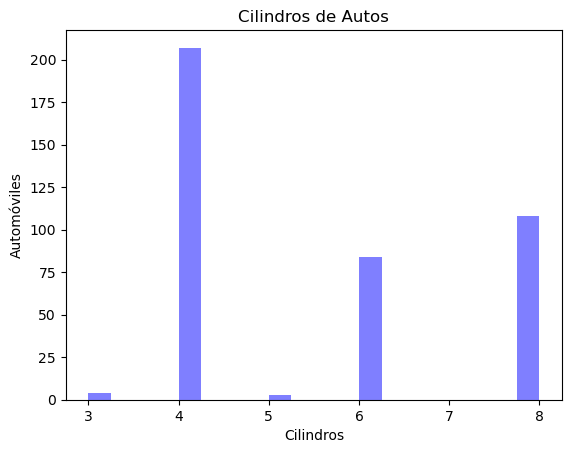

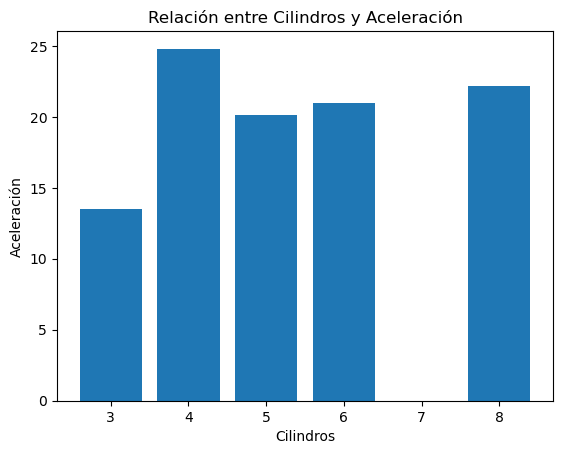

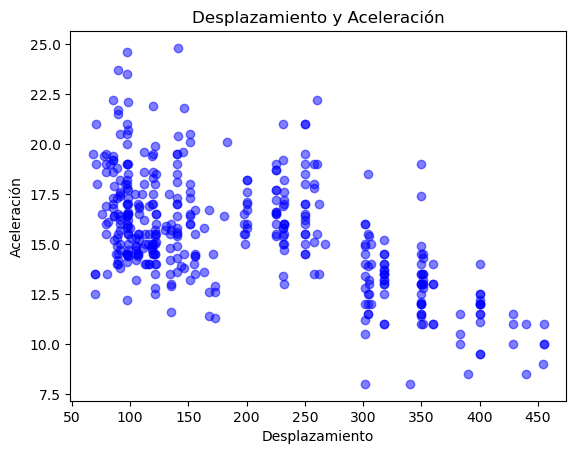

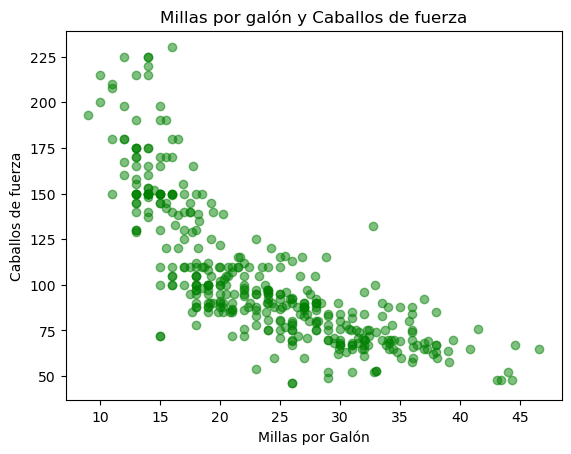

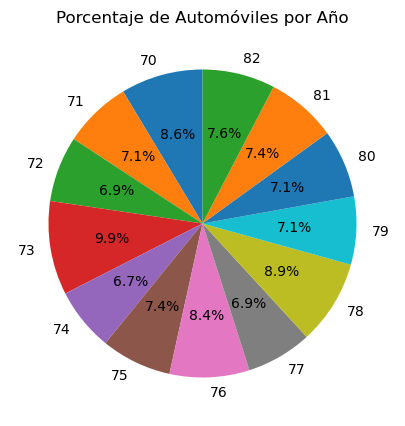

In [40]:
import matplotlib.pyplot as plt

plt.hist(datos['cylinders'], bins=20, color='blue', alpha=0.5)
plt.xlabel('Cilindros')
plt.ylabel('Automóviles')
plt.title('Cilindros de Autos')
plt.show()

plt.bar(datos['cylinders'], datos['acceleration'])
plt.xlabel('Cilindros')
plt.ylabel('Aceleración')
plt.title('Relación entre Cilindros y Aceleración')
plt.show()

plt.scatter(datos['displacement'], datos['acceleration'], color='blue', alpha=0.5)
plt.xlabel('Desplazamiento')
plt.ylabel('Aceleración')
plt.title('Desplazamiento y Aceleración')
plt.show()

plt.scatter(datos['mpg'], datos['horsepower'], color='green', alpha=0.5)
plt.xlabel('Millas por Galón')
plt.ylabel('Caballos de fuerza')
plt.title('Millas por galón y Caballos de fuerza')
plt.show()

plt.figure(figsize=(10, 5))
resultado = datos.groupby(['model year']).size().reset_index(name='anios')
plt.pie(resultado['anios'], labels=resultado['model year'], autopct='%1.1f%%', startangle=90)
plt.title('Porcentaje de Automóviles por Año')
plt.show()



## Informe
### Visualizaciones

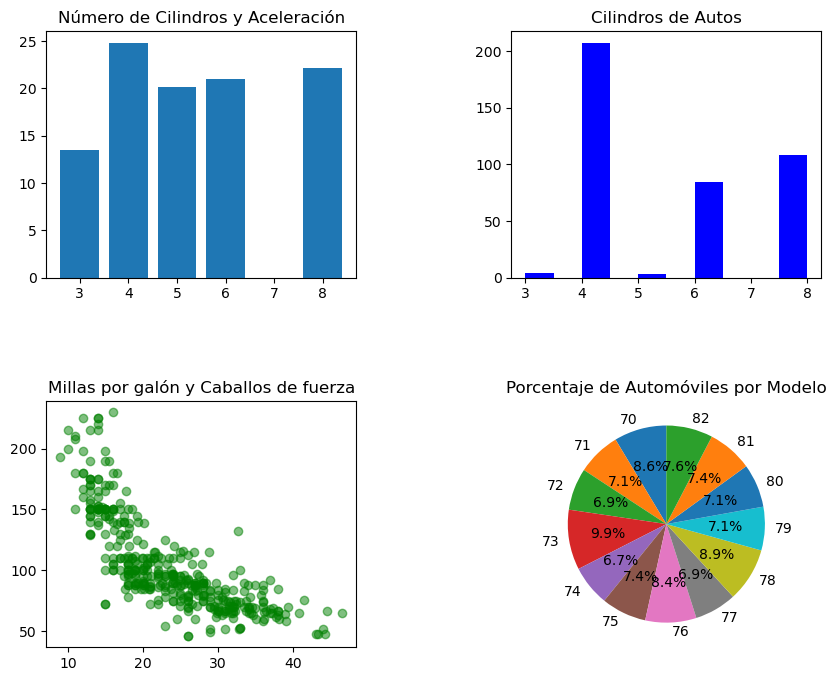

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(2, 2, figsize=(10, 8))

axs[0, 0].bar(datos['cylinders'], datos['acceleration'])
axs[0, 0].set_title('Número de Cilindros y Aceleración')

axs[0, 1].hist(datos['cylinders'], color='blue')
axs[0, 1].set_title('Cilindros de Autos')

axs[1, 0].scatter(datos['mpg'], datos['horsepower'], c='green', marker='o', alpha=0.5)
axs[1, 0].set_title('Millas por galón y Caballos de fuerza')

resultado = datos.groupby(['model year']).size().reset_index(name='anios')
axs[1, 1].pie(resultado['anios'], labels=resultado['model year'], autopct='%1.1f%%', startangle=90)
axs[1, 1].set_title('Porcentaje de Automóviles por Modelo')

plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.show()

### Consluiones